# (3)姿勢検出(PoseNet)
CurrentDirectoryにpose_iter_440000.caffemodelを置いておく

In [1]:
from chainer.serializers import npz
from chainer.links.caffe.caffe_function import CaffeFunction

caffemodel = CaffeFunction('pose_iter_440000.caffemodel')
npz.save_npz('coco_posenet.npz', caffemodel, compression=False)

%matplotlib inline

import os
import sys

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# モジュール検索パスの設定
REPO_ROOT = '..'
sys.path.append(REPO_ROOT)

# PoseDetectorクラスのインポート
from pose_detector import PoseDetector

# モデルのロード
arch_name = 'posenet'
image_path = os.path.join(REPO_ROOT, 'data', 'person.png')
weight_path = 'coco_posenet.npz'

model = PoseDetector(arch_name, weight_path)

C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\chainer\links\caffe\caffe_function.py:165: UserWarning: Skip the layer "data", since CaffeFunction does not support CPMData layer
  'support %s layer' % (layer.name, layer.type))
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\chainer\links\caffe\caffe_function.py:165: UserWarning: Skip the layer "silence2", since CaffeFunction does not support Silence layer
  'support %s layer' % (layer.name, layer.type))
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\chainer\links\caffe\caffe_function.py:165: UserWarning: Skip the layer "loss_stage1_L1", since CaffeFunction does not support EuclideanLoss layer
  'support %s layer' % (layer.name, layer.type))
C:\ProgramData\Anaconda3\envs\Tersorflow\lib\site-packages\chainer\links\caffe\caffe_function.py:165: UserWarning: Skip the layer "loss_stage1_L2", since CaffeFunction does not support EuclideanLoss layer
  'support %s layer' % (layer.name, layer.type))
C:\ProgramDa

Loading the model...


In [2]:
from pose_detector import draw_person_pose

#指定したファイルの読み込み
filename='img_1.jpg'
img=cv2.imread(filename)

#姿勢検出
pose_arr = model(img)

#元の画像に重ねて描画
result_img = draw_person_pose(img, pose_arr[0])

#出力ファイル名の指定
new_filename='output.jpg'

#ファイル出力
cv2.imwrite(new_filename,result_img)

C:\Users\Administrator\Desktop\Kaggle Driver Detection All Data\(3)姿勢検出\PoseNet\pose_detector.py:147: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paf_in_edge = np.hstack([paf[0][np.hsplit(integ_points, 2)], paf[1][np.hsplit(integ_points, 2)]])


True

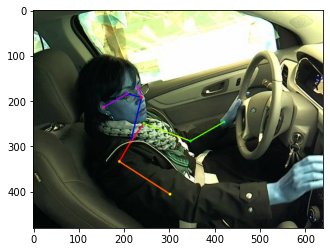

In [3]:
import matplotlib.pyplot as plt
plt.imshow(result_img)